# ggplot 270 - make smooth lines with stat_smooth

stat_smooth is an alias for geom_smooth.  
It uses statical calculation to derive from the data a smooth trend-line.  
An ribbon around that line shows the SE standard error.  

# 0 - setup notebook

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from plotnine import * 

# 1 - get some data

In [2]:
dia = pd.read_csv('./dat/dia.csv')

# 2 - example smooth line 

First have a look at the data points again.

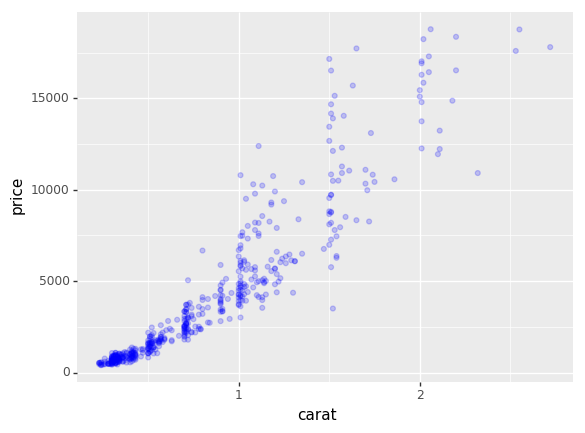

<ggplot: (-9223372036840373048)>

In [3]:
ggplot(data= dia, mapping=aes(x='carat', y='price')) + \
    geom_point(color='blue', alpha=0.2)

Now find a smooth line through the "middle" of the dot cloud.  
geom_smooth() produces such a line.

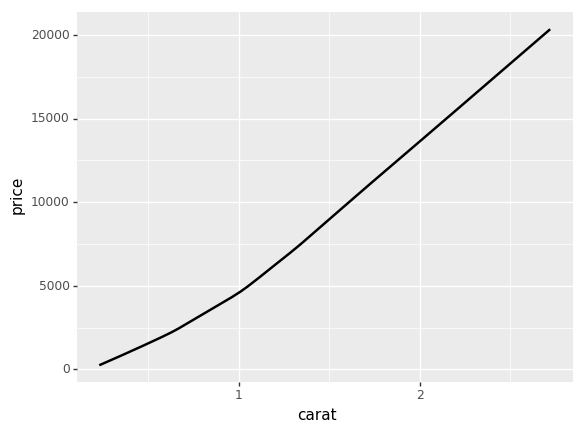

<ggplot: (14443563)>

In [4]:
ggplot(mapping=aes(x='carat', y='price'), data=dia) + \
    stat_smooth()

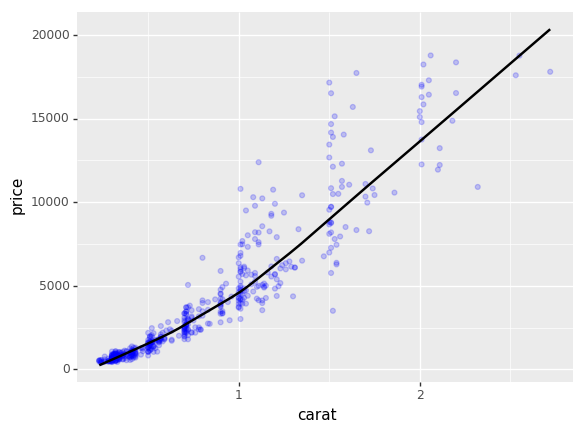

<ggplot: (-9223372036840274709)>

In [5]:
ggplot(mapping=aes(x='carat', y='price'), data=dia) + \
    geom_point(color='blue', alpha=0.2) + \
    geom_smooth()

As you can see the smooth line goes trough the "middle" of the dots.

We can use the smooth line as a sort of summery of the points cloud  
(the line capturers the pattern in the dot-cloud in a concise way)

## Aesthetics  

x -------- (x position)  
y -------- (y position)  
alpha ---- (transparency)  
color ---- (color of the line)  
fill ----- (color of the shaded area around the line)  
linetype - (either "solid", "dashed" or "dotted" - solid is the default-)  
size ----- (how thick is the line)  
se ------- (show the se-ribbon: True or False)

# 3 - specify the method to make the smooth line

The smooth line is calculated from the data points.  
There are several methods to do this calculation.  
Depending on the method the resulting line may be different. 

In plotnine the method can be:

Straight lines  
- 'auto' ------- Use loess or lowess if (n<1000), glm otherwise  
- 'lm', 'ols' -- Linear Model  
- 'wls' -------- Weighted Linear Model  
- 'rlm' -------- Robust Linear Model  
- 'glm' -------- Generalized linear Model  
- 'gls' -------- Generalized Least Squares  

Curved lines  
- 'lowess' ----- Locally Weighted Regression (simple)
- 'loess' ------ Locally Weighted Regression
- 'mavg' ------- Moving Average
- 'gpr' -------- Gaussian Process Regressor

If nothing is specified the method is 'auto'.  
In our case, with 500 data points, the automatically chosen method was 'lowess'

## 3.1 - straigth line example

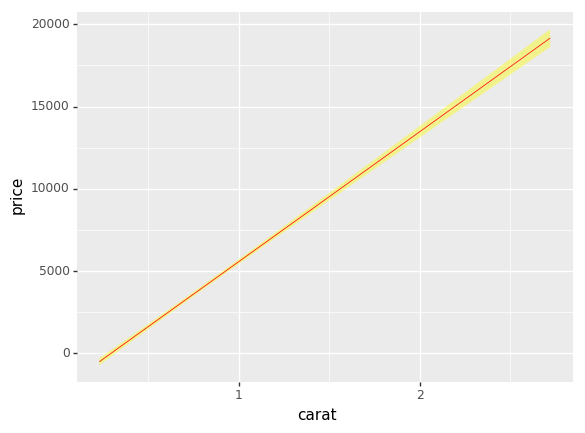

<ggplot: (14583749)>

In [6]:
ggplot(mapping=aes(x='carat', y='price'), data=dia) + \
        stat_smooth(method='lm', size=0.3, color='red',fill='yellow')

There is a yellow band around the red line.  
The band represents the standard error.  

The standard error can be suppressed with se=False (see the next example)

## 3.2 - non-straigth lines 

## mavg

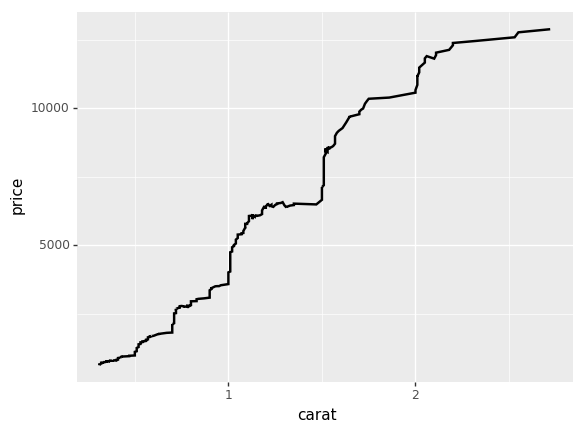

<ggplot: (14560853)>

In [7]:
ggplot(mapping=aes(x='carat', y='price'), data=dia) + \
        geom_smooth(method='mavg', se=False)

The line shows the [moving average](https://en.wikipedia.org/wiki/Moving_average).   
As the plot below shows in plotnine something goes wrong with the se-error ribbon around the line. 
We can disable the se with se=False (see the plot above).

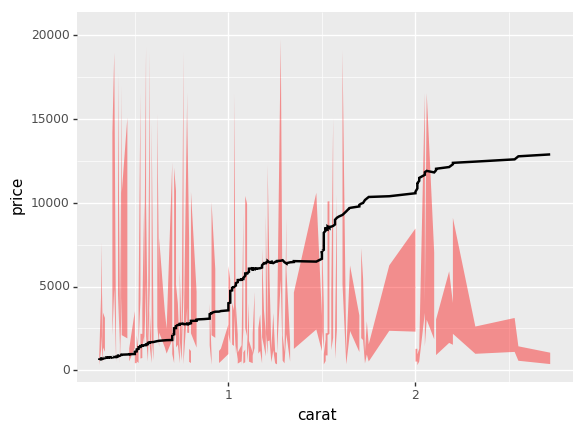

<ggplot: (14634707)>

In [8]:
ggplot(mapping=aes(x='carat', y='price'), data=dia) + \
        geom_smooth(method='mavg', fill='red')